In [1]:
#Importing the dependecies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

In [2]:
#Loading the dataset
df = pd.read_csv('/Users/shivakumarkaranam/Documents/infosys/data.csv', encoding='latin-1')

In [3]:
#Exploring the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [4]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [5]:
df.describe()

,Sentence,Sentiment
count,5842,5842
unique,5322,3
top,Managing Director 's comments : `` Net sales f...,neutral
freq,2,3130


In [6]:
df["Sentiment"].value_counts()

Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64

Step 1: Load Uploaded Data

Step 2: Cleaning & Normalization

Step 3: Tokenization

Step 4: Stopword Removal

Step 5:Lemmatization

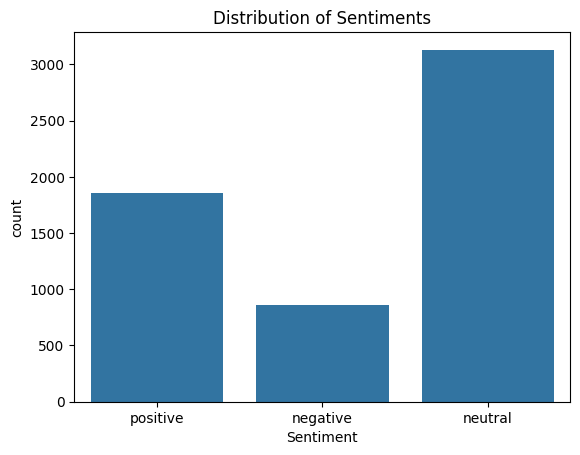

In [7]:
#Visualizing the distribution of sentiments
sns.countplot(x='Sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()

## Step - 2 : Cleaning and Normalization

In [8]:
#lower casing the sentences
df['Sentence'] = df['Sentence'].str.lower() 

In [9]:
df['Sentence'].head()

0    the geosolutions technology will leverage bene...
1    $esi on lows, down $1.50 to $2.50 bk a real po...
2    for the last quarter of 2010 , componenta 's n...
3    according to the finnish-russian chamber of co...
4    the swedish buyout firm has sold its remaining...
Name: Sentence, dtype: object

In [10]:
# removing the URLS or HTML tags
import re

for i in range(len(df)):
    df['Sentence'][i] = re.sub(r'http\S+|www\S+|https\S+', '', df['Sentence'][i], flags=re.MULTILINE)

df['Sentence'].head()


0    the geosolutions technology will leverage bene...
1    $esi on lows, down $1.50 to $2.50 bk a real po...
2    for the last quarter of 2010 , componenta 's n...
3    according to the finnish-russian chamber of co...
4    the swedish buyout firm has sold its remaining...
Name: Sentence, dtype: object

In [11]:
# removing the mentions and hashtags
for i in range(len(df)):
    df['Sentence'][i] = re.sub(r'@\w+|#\w+', '', df['Sentence'][i], flags=re.MULTILINE) 
df['Sentence'].head()

0    the geosolutions technology will leverage bene...
1    $esi on lows, down $1.50 to $2.50 bk a real po...
2    for the last quarter of 2010 , componenta 's n...
3    according to the finnish-russian chamber of co...
4    the swedish buyout firm has sold its remaining...
Name: Sentence, dtype: object

In [12]:
# removing the punctuation
for i in range(len(df)):
    df['Sentence'][i] = re.sub(r'[^A-Za-z0-9$€£%.!? ]+', '', df['Sentence'][i], flags=re.MULTILINE)
df['Sentence'].head()

0    the geosolutions technology will leverage bene...
1    $esi on lows down $1.50 to $2.50 bk a real pos...
2    for the last quarter of 2010  componenta s net...
3    according to the finnishrussian chamber of com...
4    the swedish buyout firm has sold its remaining...
Name: Sentence, dtype: object

In [13]:
# removing extra spaces
for i in range(len(df)):
    df['Sentence'][i] = re.sub(r'\s+', ' ', df['Sentence'][i], flags=re.MULTILINE).strip()
df['Sentence'].head()

0    the geosolutions technology will leverage bene...
1    $esi on lows down $1.50 to $2.50 bk a real pos...
2    for the last quarter of 2010 componenta s net ...
3    according to the finnishrussian chamber of com...
4    the swedish buyout firm has sold its remaining...
Name: Sentence, dtype: object

In [14]:
!pip install nltk


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


## step - 3 - Tokenization

In [15]:
# tokenization
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')   # <-- new requirement in NLTK 3.9+

from nltk.tokenize import word_tokenize
df['Tokens'] = df['Sentence'].apply(lambda x: word_tokenize(x.lower()))

df[['Sentence', 'Tokens']].head()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shivakumarkaranam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/shivakumarkaranam/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Sentence,Tokens
0,the geosolutions technology will leverage bene...,"[the, geosolutions, technology, will, leverage..."
1,$esi on lows down $1.50 to $2.50 bk a real pos...,"[$, esi, on, lows, down, $, 1.50, to, $, 2.50,..."
2,for the last quarter of 2010 componenta s net ...,"[for, the, last, quarter, of, 2010, componenta..."
3,according to the finnishrussian chamber of com...,"[according, to, the, finnishrussian, chamber, ..."
4,the swedish buyout firm has sold its remaining...,"[the, swedish, buyout, firm, has, sold, its, r..."


## Step - 4 - Stopwords removing

In [16]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# Get English stopwords and tokenize
stop_words = set(stopwords.words('english'))

df['Tokens'] = df['Tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])
df[['Sentence', 'Tokens']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shivakumarkaranam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Sentence,Tokens
0,the geosolutions technology will leverage bene...,"[geosolutions, technology, leverage, benefon, ..."
1,$esi on lows down $1.50 to $2.50 bk a real pos...,"[$, esi, lows, $, 1.50, $, 2.50, bk, real, pos..."
2,for the last quarter of 2010 componenta s net ...,"[last, quarter, 2010, componenta, net, sales, ..."
3,according to the finnishrussian chamber of com...,"[according, finnishrussian, chamber, commerce,..."
4,the swedish buyout firm has sold its remaining...,"[swedish, buyout, firm, sold, remaining, 22.4,..."


## Step - 5 - Lemmatization

In [17]:
# from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')

# lemmatizer = WordNetLemmatizer()
# df['Lemmatized_Tokens'] = df['Tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
# df[['Tokens', 'Lemmatized_Tokens']].head()

In [18]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

# Download required resources
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')  # for newer NLTK versions
nltk.download('wordnet')
nltk.download('omw-1.4')


lemmatizer = WordNetLemmatizer()

# Helper to convert POS tag from nltk -> wordnet format
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Apply lemmatization with POS
def lemmatize_tokens(tokens):
    pos_tags = pos_tag(tokens)
    return [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]

df['Lemmatized_Tokens'] = df['Tokens'].apply(lemmatize_tokens)

df[['Tokens', 'Lemmatized_Tokens','Sentence', 'Sentiment']].head()


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/shivakumarkaranam/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/shivakumarkaranam/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shivakumarkaranam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/shivakumarkaranam/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Tokens,Lemmatized_Tokens,Sentence,Sentiment
0,"[geosolutions, technology, leverage, benefon, ...","[geosolutions, technology, leverage, benefon, ...",the geosolutions technology will leverage bene...,positive
1,"[$, esi, lows, $, 1.50, $, 2.50, bk, real, pos...","[$, esi, low, $, 1.50, $, 2.50, bk, real, poss...",$esi on lows down $1.50 to $2.50 bk a real pos...,negative
2,"[last, quarter, 2010, componenta, net, sales, ...","[last, quarter, 2010, componenta, net, sale, d...",for the last quarter of 2010 componenta s net ...,positive
3,"[according, finnishrussian, chamber, commerce,...","[accord, finnishrussian, chamber, commerce, ma...",according to the finnishrussian chamber of com...,neutral
4,"[swedish, buyout, firm, sold, remaining, 22.4,...","[swedish, buyout, firm, sell, remain, 22.4, pe...",the swedish buyout firm has sold its remaining...,neutral


In [19]:
# Cleaned and preprocessed data 

df['Cleaned_Sentence'] = df['Lemmatized_Tokens'].apply(lambda tokens: ' '.join(tokens))

In [20]:
df

,Sentence,Sentiment,Tokens,Lemmatized_Tokens,Cleaned_Sentence
0,the geosolutions technology will leverage bene...,positive,"[geosolutions, technology, leverage, benefon, ...","[geosolutions, technology, leverage, benefon, ...",geosolutions technology leverage benefon gps s...
1,$esi on lows down $1.50 to $2.50 bk a real pos...,negative,"[$, esi, lows, $, 1.50, $, 2.50, bk, real, pos...","[$, esi, low, $, 1.50, $, 2.50, bk, real, poss...",$ esi low $ 1.50 $ 2.50 bk real possibility
2,for the last quarter of 2010 componenta s net ...,positive,"[last, quarter, 2010, componenta, net, sales, ...","[last, quarter, 2010, componenta, net, sale, d...",last quarter 2010 componenta net sale double e...
3,according to the finnishrussian chamber of com...,neutral,"[according, finnishrussian, chamber, commerce,...","[accord, finnishrussian, chamber, commerce, ma...",accord finnishrussian chamber commerce major c...
4,the swedish buyout firm has sold its remaining...,neutral,"[swedish, buyout, firm, sold, remaining, 22.4,...","[swedish, buyout, firm, sell, remain, 22.4, pe...",swedish buyout firm sell remain 22.4 percent s...
...,...,...,...,...,...
5837,rising costs have forced packaging producer hu...,negative,"[rising, costs, forced, packaging, producer, h...","[rise, cost, force, package, producer, huhtama...",rise cost force package producer huhtamaki axe...
5838,nordic walking was first used as a summer trai...,neutral,"[nordic, walking, first, used, summer, trainin...","[nordic, walk, first, use, summer, train, meth...",nordic walk first use summer train method cros...
5839,according shipping company viking line the eu ...,neutral,"[according, shipping, company, viking, line, e...","[accord, ship, company, viking, line, eu, deci...",accord ship company viking line eu decision si...
5840,in the building and home improvement trade sal...,neutral,"[building, home, improvement, trade, sales, de...","[building, home, improvement, trade, sale, dec...",building home improvement trade sale decrease ...


In [27]:
dataset = df[['Cleaned_Sentence', 'Sentiment']]

In [28]:
dataset

,Cleaned_Sentence,Sentiment
0,geosolutions technology leverage benefon gps s...,positive
1,$ esi low $ 1.50 $ 2.50 bk real possibility,negative
2,last quarter 2010 componenta net sale double e...,positive
3,accord finnishrussian chamber commerce major c...,neutral
4,swedish buyout firm sell remain 22.4 percent s...,neutral
...,...,...
5837,rise cost force package producer huhtamaki axe...,negative
5838,nordic walk first use summer train method cros...,neutral
5839,accord ship company viking line eu decision si...,neutral
5840,building home improvement trade sale decrease ...,neutral


In [29]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Sentiment'] = le.fit_transform(dataset['Sentiment'])

In [31]:
dataset

,Cleaned_Sentence,Sentiment
0,geosolutions technology leverage benefon gps s...,2
1,$ esi low $ 1.50 $ 2.50 bk real possibility,0
2,last quarter 2010 componenta net sale double e...,2
3,accord finnishrussian chamber commerce major c...,1
4,swedish buyout firm sell remain 22.4 percent s...,1
...,...,...
5837,rise cost force package producer huhtamaki axe...,0
5838,nordic walk first use summer train method cros...,1
5839,accord ship company viking line eu decision si...,1
5840,building home improvement trade sale decrease ...,1


In [32]:
dataset.to_csv('/Users/shivakumarkaranam/Documents/infosys/cleaned_sentiment_data.csv', index=False)